In [8]:
import pandas as pd

file_path = '/Users/dev/Downloads/diabetes_prediction_dataset.csv'

df = pd.read_csv(file_path)
print(df)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

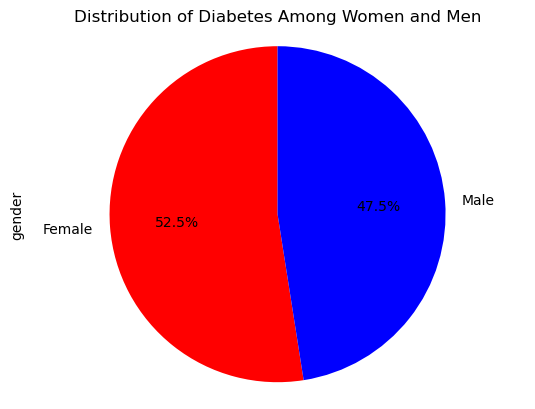

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/dev/Downloads/diabetes_prediction_dataset.csv'

df = pd.read_csv(file_path)

diabetes_df = df[df['diabetes'] == 1]

diabetes_counts = diabetes_df['gender'].value_counts()

diabetes_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['red','blue'])

plt.axis('equal')  
plt.title('Distribution of Diabetes Among Women and Men')
plt.show()

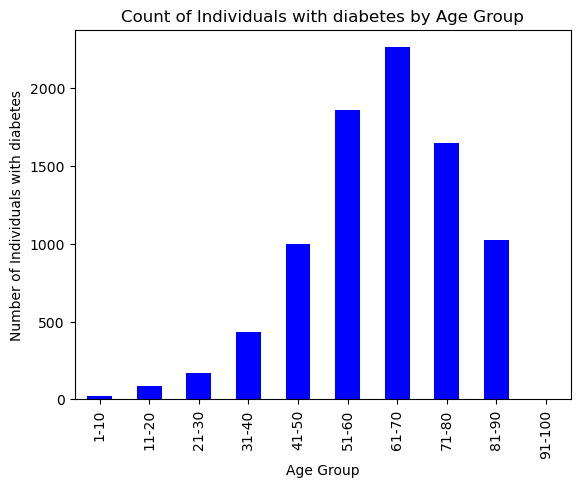

In [29]:
#this part makes it so people who are 20, 20, 30 etc fall under the 1-10 category and so on
age_bins = list(range(0, 101, 10))
age_labels = [f'{i+1}-{i+10}' for i in range(0, 100, 10)]

df['AgeGroup'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

diabetes_df = df[df['diabetes'] == 1]

diabetes_counts = diabetes_df['AgeGroup'].value_counts().sort_index()

diabetes_counts.plot(kind='bar', color='blue')

plt.xlabel('Age Group')
plt.ylabel('Number of Individuals with diabetes')
plt.title('Count of Individuals with diabetes by Age Group')

plt.show()


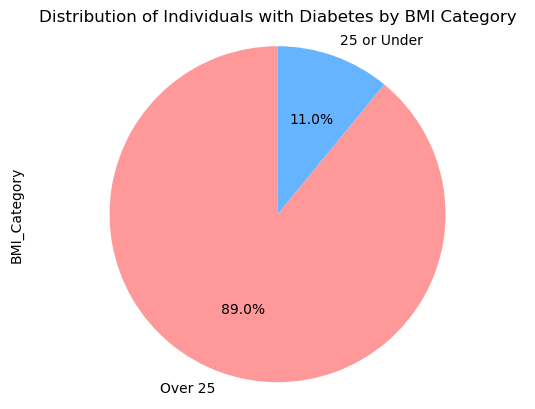

In [35]:
diabetes_df = df[df['diabetes'] == 1].copy()  # Using .copy() to avoid SettingWithCopyWarning

diabetes_df.loc[:, 'BMI_Category'] = diabetes_df['bmi'].apply(lambda bmi: 'Over 25' if bmi > 25 else '25 or Under')

bmi_counts = diabetes_df['BMI_Category'].value_counts()

bmi_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

plt.axis('equal')  
plt.title('Distribution of Individuals with Diabetes by BMI Category')
plt.show()

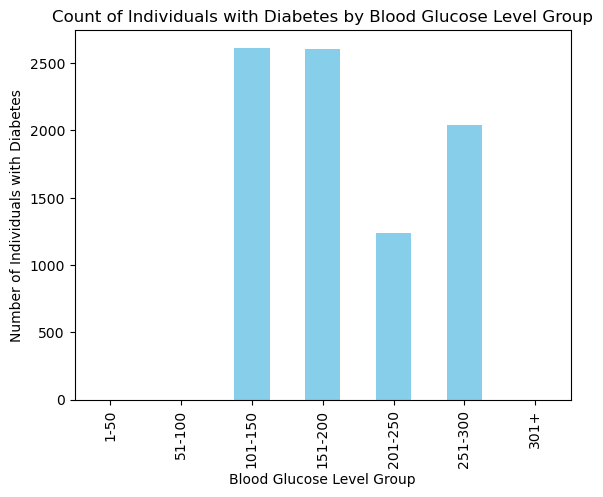

In [38]:
glucose_bins = list(range(0, 351, 50))  # 0, 50, 100, ..., 350
glucose_labels = [f'{i+1}-{i+50}' for i in range(0, 300, 50)] + ['301+']

df['GlucoseGroup'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True)

diabetes_df = df[df['diabetes'] == 1]

diabetes_glucose_counts = diabetes_df['GlucoseGroup'].value_counts().sort_index()

diabetes_glucose_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Blood Glucose Level Group')
plt.ylabel('Number of Individuals with Diabetes')
plt.title('Count of Individuals with Diabetes by Blood Glucose Level Group')

plt.show()

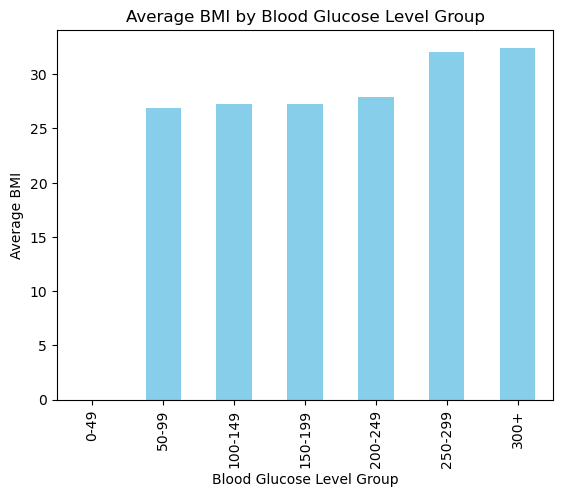

In [41]:
glucose_bins = list(range(0, 351, 50))  # Starts at 0, ends at 350, increments of 50
glucose_labels = [f'{i}-{i+49}' for i in range(0, 300, 50)] + ['300+']

df['GlucoseGroup'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, include_lowest=True, right=False)

grouped_df = df.groupby('GlucoseGroup')['bmi'].mean()

grouped_df.plot(kind='bar', color='skyblue')

plt.xlabel('Blood Glucose Level Group')
plt.ylabel('Average BMI')
plt.title('Average BMI by Blood Glucose Level Group')

plt.show()